<a href="https://colab.research.google.com/github/raphaellimalm/PythonGoogleColab/blob/main/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas DataFrame: Create from lists of values

In [ ]:
import pandas as pd

last_names = ['Connor', 'Connor', 'Reese']
first_names = ['Sarah', 'John', 'Kyle']
df = pd.DataFrame({
  'first_name': first_names,
  'last_name': last_names,
})
df

## Pandas DataFrame: Rename multiple Columns

In [ ]:
import pandas as pd
df = pd.DataFrame({
    'Year': [2016, 2015, 2014, 2013, 2012],
    'Top Animal': ['Giant panda', 'Chicken', 'Pig', 'Turkey', 'Dog']
})

df.rename(columns={
    'Year': 'Calendar Year',
    'Top Animal': 'Favorite Animal',
}, inplace=True)
df

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# @title Favorite Animal

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Favorite Animal').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Pandas DataFrame: Query by regexp (regular expression)

In [ ]:
import pandas as pd
df = pd.DataFrame({
  'first_name': ['Sarah', 'John', 'Kyle', 'Joe'],
  'last_name': ['Connor', 'Connor', 'Reese', 'Bonnot'],
})

df[df.last_name.str.match('.*onno.*')]

## Pandas DataFrame: Query by variable value

Evaluate a variable as the value to find.

In [ ]:
import pandas as pd
df = pd.DataFrame({
  'first_name': ['Sarah', 'John', 'Kyle'],
  'last_name': ['Connor', 'Connor', 'Reese'],
})

foo = 'Connor'
df.query('last_name == @foo')

## Pandas DataFrame: Query using variable value as a column name

Evaluate a variable, to use its value as the name of a column in a query.

E.g. Query for rows where `John` is the value in the column named `first_name`.

In [ ]:
import pandas as pd
df = pd.DataFrame(data={
  'first_name': ['Sarah', 'John', 'Kyle'],
  'last_name': ['Connor', 'Connor', 'Reese'],
})

column_name = 'first_name'
df.query(f"`{column_name}` == 'John'")

## Pandas DataFrame: Query by Timestamp above a value

In [ ]:
import pandas as pd
df = pd.DataFrame({
  'time': ['2022-09-14 00:52:00-07:00', '2022-09-14 00:52:30-07:00',
           '2022-09-14 01:52:30-07:00'],
  'letter': ['A', 'B', 'C'],
})
df['time'] = pd.to_datetime(df.time)

df.query('time >= "2022-09-14 00:52:30-07:00"')

## Pandas DataFrame: Query for Timestamp between two values

In [ ]:
import pandas as pd
df = pd.DataFrame({
  'time': ['2022-09-14 00:52:00-07:00', '2022-09-14 00:52:30-07:00',
           '2022-09-14 01:52:30-07:00'],
  'letter': ['A', 'B', 'C'],
})
df['time'] = pd.to_datetime(df.time)

begin_ts = '2022-09-14 00:52:00-07:00'
end_ts = '2022-09-14 00:54:00-07:00'

df.query('@begin_ts <= time < @end_ts')

## Pandas DataFrame: Filter by Timestamp in DatetimeIndex using `.loc[]`

In [ ]:
import pandas as pd
df = pd.DataFrame({
  'time': ['2022-09-14 00:52:00-07:00', '2022-09-14 00:52:30-07:00',
           '2022-09-14 01:52:30-07:00'],
  'letter': ['A', 'B', 'C'],
})
df['time'] = pd.to_datetime(df.time)
df.set_index('time', inplace=True)

df.loc['2022-09-14':'2022-09-14 00:53']

## Pandas DataFrame: Filter by Timestamp using TimeDelta string

In [ ]:
import pandas as pd
df = pd.DataFrame({
  'time': ['2022-09-14 00:52:00-07:00', '2022-09-14 00:52:30-07:00',
           '2022-09-14 01:52:30-07:00'],
  'letter': ['A', 'B', 'C'],
})
df['time'] = pd.to_datetime(df.time)

def rows_in_time_range(df, time_column, start_ts_str, timedelta_str):
  # Return rows from df, where start_ts < time_column <= start_ts + delta.
  # start_ts_str can be a date '2022-09-01' or a time '2022-09-14 00:52:00-07:00'
  # timedelta_str examples: '2 minutes'  '2 days 2 hours 15 minutes 30 seconds'
  start_ts = pd.Timestamp(start_ts_str).tz_localize('US/Pacific')
  end_ts = start_ts + pd.to_timedelta(timedelta_str)
  return df.query("@start_ts <= {0} < @end_ts".format(time_column))

rows_in_time_range(df, 'time', '2022-09-14 00:00', '52 minutes 31 seconds')

## Pandas: Describe Timestamp values in a column

In [ ]:
import pandas as pd
df = pd.DataFrame({
  'time': ['2022-09-14 00:52:00-07:00', '2022-09-14 00:52:30-07:00',
           '2022-09-14 01:52:30-07:00'],
  'letter': ['A', 'B', 'C'],
})
df['time'] = pd.to_datetime(df.time)

df['time'].describe(datetime_is_numeric=True)

## Pandas DataFrame: Explode a column containing dictionary values into multiple columns

This code transforms or splits the dictionary column into many columns.

E.g. The output DataFrame of this cell will have columns named [`date, letter, fruit, weather`].

In [ ]:
import pandas as pd
df = pd.DataFrame({
  'date': ['2022-09-14', '2022-09-15', '2022-09-16'],
  'letter': ['A', 'B', 'C'],
  'dict' : [{ 'fruit': 'apple', 'weather': 'aces'},
            { 'fruit': 'banana', 'weather': 'bad'},
            { 'fruit': 'cantaloupe', 'weather': 'cloudy'}],
})

pd.concat([df.drop(['dict'], axis=1), df['dict'].apply(pd.Series)], axis=1)

## Pandas DataFrame: Extract values using regexp (regular expression)

In [ ]:
import pandas as pd
df = pd.DataFrame({
  'request': ['GET /index.html?baz=3', 'GET /foo.html?bar=1'],
})

df['request'].str.extract('GET /([^?]+)\?', expand=True)

## Pandas Timestamp: Convert string to Timestamp, using date only

I.e. Midnight on the given date.

In [ ]:
import pandas as pd

pd.Timestamp('9/27/22').tz_localize('US/Pacific')

## Pandas Timestamp: Convert string to Timestamp

In [ ]:
import pandas as pd

pd.Timestamp('9/27/22 06:59').tz_localize('US/Pacific')

## Pandas: Create a TimeDelta using `unit`

From an integer.
`unit` is a string, defaulting to `ns`. Possible values:


In [ ]:
import pandas as pd

pd.to_timedelta(1, unit='h')

## Pandas: Create a TimeDelta using available kwargs

Example keyworded args: {days, seconds, microseconds, milliseconds, minutes, hours, weeks}

In [ ]:
import pandas as pd

pd.Timedelta(days=2)

## Pandas: Create a TimeDelta from a string

In [ ]:
import pandas as pd

pd.Timedelta('2 days 2 hours 15 minutes 30 seconds')

## Pandas: Replace NaN values in a Column

In [ ]:
import numpy as np
import pandas as pd
df = pd.DataFrame({
  'dogs': [5, 10, np.nan, 7],
})

df['dogs'].replace(np.nan, 0, regex=True)

## Pandas DataFrame: Drop duplicate rows

In [ ]:
import pandas as pd
df = pd.DataFrame({
  'first_name': ['Sarah', 'John', 'Kyle', 'Joe'],
  'last_name': ['Connor', 'Connor', 'Reese', 'Bonnot'],
})
df.set_index('last_name', inplace=True)

df.loc[~df.index.duplicated(), :]

## Pandas DataFrame: Ignore one Column

In [ ]:
import pandas as pd
df = pd.DataFrame({
  'first_name': ['Sarah', 'John', 'Kyle', 'Joe'],
  'last_name': ['Connor', 'Connor', 'Reese', 'Bonnot'],
})

df.loc[:, df.columns!='last_name']

## Pandas DataFrame: Intersect Indexes

In [ ]:
import pandas as pd
terminator_df = pd.DataFrame({
  'first_name': ['Sarah', 'John', 'Kyle'],
  'last_name': ['Connor', 'Connor', 'Reese'],
})
terminator_df.set_index('first_name', inplace=True)

buckaroo_df = pd.DataFrame({
  'first_name': ['John', 'John', 'Buckaroo'],
  'last_name': ['Parker', 'Whorfin', 'Banzai'],
})
buckaroo_df.set_index('first_name', inplace=True)

terminator_df.index.intersection(buckaroo_df.index).shape

## Pandas DataFrame: Select all rows from A that are not in B, using the index

In [ ]:
import pandas as pd
terminator_df = pd.DataFrame({
  'first_name': ['Sarah', 'John', 'Kyle'],
  'last_name': ['Connor', 'Connor', 'Reese'],
})
terminator_df.set_index('first_name', inplace=True)

buckaroo_df = pd.DataFrame({
  'first_name': ['John', 'John', 'Buckaroo'],
  'last_name': ['Parker', 'Whorfin', 'Banzai'],
})
buckaroo_df.set_index('first_name', inplace=True)

terminator_df[~terminator_df.index.isin(buckaroo_df.index)]

## Pandas DataFrame: Select rows by an attribute of a column value

Use the Series `map()` method.
E.g. To filter by the length of a column values:

In [ ]:
import pandas as pd
df = pd.DataFrame({
  'first_name': ['Sarah', 'John', 'Kyle'],
  'last_name': ['Connor', 'Connor', 'Reese'],
})

df[df['last_name'].map(len) == 5]

## Pandas DataFrame: Sort the count of rows grouped on columns

In [ ]:
import pandas as pd
df = pd.DataFrame({
  'first_name': ['Sarah', 'John', 'Kyle'],
  'last_name': ['Connor', 'Connor', 'Reese'],
})

df.groupby(['last_name']).size().sort_values(ascending=False)

## Pandas DataFrame: Reshape to have 1 row per value in a list column

Creates a new DataFrame that is a transformed version of the input. E.g.
*   Input: df with a column named `msg_ids` that is a list of values (i.e. many per row, at least in some rows).
*   Output: new_df which has 1 row per unique value found in any of the original `msg_ids` lists, with that value in a new column named `msg_id`.


In [ ]:
import pandas as pd
df = pd.DataFrame({
  'date': ['9/1/22', '9/2/22', '9/3/22'],
  'action': ['Add', 'Update', 'Delete'],
  'msg_ids': [[1, 2, 3], [], [2, 3]],
})
df.set_index('date', inplace=True)


temp_series = df['msg_ids'].apply(pd.Series, 1).stack()
temp_series.index = temp_series.index.droplevel(-1)
temp_series.name = 'msg_id'
new_df = temp_series.to_frame()
new_df.set_index('msg_id', inplace=True)
new_df.loc[~new_df.index.duplicated(), :] # Drop duplicates.

## Pandas: DataFrames: Group Timeseries by Frequency

You can group timestamped data into intervals of arbitrary duration using a Grouper object to specify groupby instructions.  The `freq` parameter is a string that may contain an integer followed by an [offset alias](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).  E.g. To see output for 2 minute long intervals:

In [ ]:
import pandas as pd
df = pd.DataFrame({
  'time': ['2022-09-01 00:00:01-07:00', '2022-09-01 00:00:02-07:00',
           '2022-09-01 00:01:00-07:00', '2022-09-01 00:02:00-07:00',
           '2022-09-01 00:03:00-07:00', '2022-09-01 00:04:00-07:00',
           '2022-09-01 00:05:00-07:00', '2022-09-01 00:07:00-07:00'],
  'requests': [1, 1, 1, 1, 1, 1, 1, 1],
})
df['time'] = pd.to_datetime(df.time)

df.groupby(pd.Grouper(key='time', freq='2min')).sum()

In [ ]:
import webbrowser

In [ ]:


def find_city_on_google_earth(city_name):
  google_earth_url =f'https://earth.google.com/web/search/{city_name}'

  webbrowser.open(google_earth_url)

  find_city_on_google_earth("New york City")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# discretizando as duas variáveis de ângulo
angle = np.linspace(0, 2 * np.pi, 32)
theta, phi = np.meshgrid(angle, angle)

# pegando valores comuns para os raios interno e exteno
r, R = 0.3, 1

# parametrização
x = (R + r * np.cos(phi)) * np.cos(theta)
y = (R + r * np.cos(phi)) * np.sin(theta)
z = r * np.sin(phi)

# criando o ambiente 3d
fig = plt.figure()
ax = plt.axes(projection='3d')

# limitando os eixos
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)

# exibindo a figura
ax.plot_surface(x, y, z, rstride=1, cstride=1)
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# definindo a função
def f(x, y):
    return np.sqrt(9-x**2+y**2)

# discretizando x e y
x = np.linspace(-3, 3, 50)
y = np.linspace(-3, 3, 50)

# artifício do produto cartesiano
x, y = np.meshgrid(x, y)

# define z como z=f(x,y)
z = f(x, y)

# indica que iremos fazer um gráfico 3d e nomeia os eixos
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# finalmente, adiciona a função (no caso, estamos plotando
# em versão wireframe, ou seja, você vai ver a malha sobre a
# superfície.

ax.plot_wireframe(x, y, z)

In [ ]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# o comando abaixo é muito parecido com o linspace que usamos antes.
# a diferença é que aqui, ao invés de definirmos o número de pontos
# que iremos usar para plotar, vamos definir ponto inicial, ponto
# final e o incremento, neste caso delta=0.025.
# é só uma outra forma de fazer a discretização.
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)


# aqui o primeiro truque: transformamos os dois "intervalos" de x e y
# numa malha bidimensional, fazendo uma espécie de produto cartesiano
# dos pontos, e renomeamos a primeira coordenada desses pontos como x
# e a segunda como y. esse é só um artifício técnico.
x, y = np.meshgrid(x, y)

# aqui definimos a funcao/equacao da qual vamos plotar as curvas de nivel.
# note que ela usa as variáveis com letras maiúsculas, pois o que vamos
# armazenar no vetor Z é o valor dessa funcao em cada um dos pontos da
# malha criada.
z = x**2-2*y**2-1

fig, ax = plt.subplots()

# a sintaxe do contor é intervalo X, intervalo Y, funcao e quantidade
# de contornos. abaixo, plotamos 20 curvas de nível.
contornos = ax.contour(x, y, z, 20)

ax.clabel(contornos, inline=True, fontsize=10)
ax.set_title('Curvas de nível')

plt.contour(x, y, z)



In [ ]:
import math
import numpy as np

from matplotlib import pyplot as plt

t = np.linspace(0,39 * math.pi/2, 1000)
x = t * np.cos(t) ** 3
y = 9 * t * np.sqrt(abs(np.cos(t))) + t * np.sin(0.2 * t) * np.cos(4 * t)

plt.plot(x, y, c = "green")
plt.show()

In [ ]:
import time
from plyer import notification

if _name_== "_main_":
  while True:
    notification.notify(
      title="Alert!!",
      message= "Vamos la",
      timeout=10
  )
  time.sleep(3600)

In [ ]:
pip install yt-dlp

In [ ]:
import yt_dlp

url= input ("Deixe o link do youtube: ")

ydl_opts={}

with yt_dlp.YoutubeDL(ydl_opts)as ydl:
  ydl.download([url])
  print("Video baixado com suscesso!!!")

In [ ]:
nome  = input("Digite seu nome: ")
print("Ola, " +nome+ " Bem vindo!")


# Em busca do caloteiro MATEUS SANTOS BRITO

In [ ]:
from geopy.geocoders import ArcGIS

# Função para obter a localização a partir de um endereço
def obter_localizacao(endereco):
    geolocator = ArcGIS()
    location = geolocator.geocode(endereco)
    return location

# Função para obter a localização de um CPF a partir de uma base de dados
def localizacao_por_cpf(cpf, base_de_dados):
    if cpf in base_de_dados:
        endereco = base_de_dados[cpf]
        return obter_localizacao(endereco)
    else:
        return None

# Exemplo de uso
#*base_de_dados_cpfs = {
   #135.904.066-82": "Itacarambi/MGF""
    # Adicione mais CPFs e endereços conforme necessário
cpf  = input("Digite seu CPF: ")
print("Ola, " +cpf+ " Bem vindo!")

#}

cpf = "135.904.066-82"  # CPF que você deseja localizar
localizacao = localizacao_por_cpf(cpf, base_de_dados_cpfs)

if localizacao:
    print("Localização do CPF {}: ".format(cpf))
    print("Latitude:", localizacao.latitude)
    print("Longitude:", localizacao.longitude)
else:
    print("CPF não encontrado na base de dados.")


In [ ]:
from geopy.geocoders import ArcGIS

# Função para obter a localização a partir de um endereço
def obter_localizacao(endereco):
    geolocator = ArcGIS()
    location = geolocator.geocode(endereco)
    return location

# Função para obter a localização de um CPF a partir de uma base de dados
def localizacao_por_cpf(cpf, base_de_dados):
    if cpf in base_de_dados:
        endereco = base_de_dados[cpf]
        return obter_localizacao(endereco)
    else:
        return None

# Base de dados que relaciona CPFs a endereços
base_de_dados_cpfs = {
    "135.904.066-82": "Rua Exemplo, Cidade Exemplo, Estado Exemplo"
    # Adicione mais CPFs e endereços conforme necessário
}

cpf = input("Digite seu CPF: ")
print("Olá, " + cpf + "! Bem-vindo!")

# Busca a localização do CPF inserido
localizacao = localizacao_por_cpf(cpf, base_de_dados_cpfs)

if localizacao:
    print("Localização do CPF {}: ".format(cpf))
    print("Latitude:", localizacao.latitude)
    print("Longitude:", localizacao.longitude)
else:
    print("CPF não encontrado na base de dados.")


In [ ]:
from geopy.geocoders import ArcGIS

# Função para obter a localização a partir de um endereço
def obter_localizacao(endereco):
    geolocator = ArcGIS()
    location = geolocator.geocode(endereco)
    return location

# Função para obter a localização de um CPF a partir de uma base de dados
def localizacao_por_cpf(cpf, base_de_dados):
    if cpf in base_de_dados:
        endereco = base_de_dados[cpf]
        return obter_localizacao(endereco)
    else:
        return None

# Base de dados que relaciona CPFs a endereços
base_de_dados_cpfs = {
    "135.904.066-82": "Rua Exemplo, Cidade Exemplo, Estado Exemplo"
    # Adicione mais CPFs e endereços conforme necessário
}

cpf = input("Digite seu CPF: ")
print("Olá, " + cpf + "! Bem-vindo!")

# Busca a localização do CPF inserido
localizacao = localizacao_por_cpf(cpf, base_de_dados_cpfs)

if localizacao:
    print("Localização do CPF {}: ".format(cpf))
    print("Latitude:", localizacao.latitude)
    print("Longitude:", localizacao.longitude)
else:
    print("CPF não encontrado na base de dados.")


In [ ]:
from geopy.geocoders import ArcGIS

geolocator = ArcGIS()
location = geolocator.geocode("Itacarambi, MG")

print("Latitude: ", location.latitude)
print("Longitude: ", location.longitude)

# *Geolocalização em Python*: 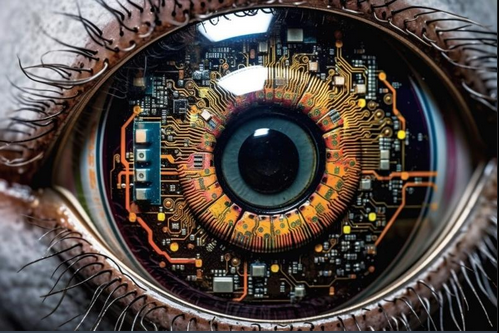





In [ ]:
from geopy.geocoders import ArcGIS

# Função para obter a localização a partir de um endereço
def obter_localizacao(endereco):
    geolocator = ArcGIS()
    location = geolocator.geocode(endereco)
    return location

# Função para encontrar bens associados a um CPF usando geolocalização
def encontrar_bens_por_cpf(cpf):
    # Suponha que você tenha uma base de dados que mapeia CPFs para endereços
    base_de_dados_cpfs = {
        "135.904.066-82": "Rua Exemplo, Cidade Exemplo, Estado Exemplo",
        # Adicione mais CPFs e endereços conforme necessário
    }

    if cpf in base_de_dados_cpfs:
        endereco = base_de_dados_cpfs[cpf]
        localizacao = obter_localizacao(endereco)
        if localizacao:
            print("Bens associados ao CPF {} estão localizados em:".format(cpf))
            print("Latitude:", localizacao.latitude)
            print("Longitude:", localizacao.longitude)
            # Aqui você pode adicionar lógica adicional para buscar bens na área geográfica, se necessário
        else:
            print("Endereço não encontrado para o CPF {}.".format(cpf))
    else:
        print("CPF não encontrado na base de dados.")

# Exemplo de uso
cpf = "123.456.789-00"  # CPF para o qual você deseja encontrar bens
encontrar_bens_por_cpf(cpf)


In [ ]:
from geopy.geocoders import ArcGIS

# Função para obter a localização a partir de um endereço
def obter_localizacao(endereco):
    geolocator = ArcGIS()
    location = geolocator.geocode(endereco)
    return location

# Exemplo de uso
endereco = "januario, Itacarambi/MG"  # Exemplo de endereço
localizacao = obter_localizacao(endereco)

if localizacao:
    print("Latitude:", localizacao.latitude)
    print("Longitude:", localizacao.longitude)
else:
    print("Endereço não encontrado.")


In [ ]:
from geopy.geocoders import ArcGIS

# Função para obter a localização a partir de um endereço
def obter_localizacao(endereco):
    geolocator = ArcGIS()
    location = geolocator.geocode(endereco)
    return location

# Função para encontrar bens associados a um CPF com base na geolocalização
def encontrar_bens_por_cpf(cpf, base_de_dados):
    bens_encontrados = []
    if cpf in base_de_dados:
        endereco = base_de_dados[cpf]
        localizacao = obter_localizacao(endereco)
        if localizacao:
            # Aqui você poderia usar a localização para buscar propriedades próximas
            # ou realizar outras análises geográficas para identificar bens associados
            # ao CPF.
            bens_encontrados.append({
                '135.904.066-82': cpf,
                'Itacarambi/MG': endereco,
                '-15.0971261': localizacao.latitude,
                '-44.0979049': localizacao.longitude
            })
    return bens_encontrados

# Exemplo de uso
base_de_dados_cpfs = {
    "135.904.066-82": "Rua Exemplo, Cidade Exemplo, Estado Exemplo"
    # Adicione mais CPFs e endereços conforme necessário
}

cpf = "135.904.066-82"  # CPF que você deseja localizar bens
bens = encontrar_bens_por_cpf(cpf, base_de_dados_cpfs)

if bens:
    print("Bens associados ao CPF {}: ".format(cpf))
    for bem in bens:
        print("Endereço:", bem['Endereço'])
        print("Latitude:", bem['Latitude'])
        print("Longitude:", bem['Longitude'])
else:
    print("CPF não encontrado na base de dados.")


In [ ]:
from geopy.distance import geodesic

# Função para calcular a distância entre duas coordenadas (em quilômetros)
def calcular_distancia(coord1, coord2):
    return geodesic(coord1, coord2).kilometers

# Localização do usuário (latitude e longitude)
localizacao_usuario = (-15.0971261, -43.2075)  # Exemplo: Rio de Janeiro, Brasil

# Lista de compras com suas coordenadas (latitude e longitude)
compras = [
    {"nome": "Mercado A", "coordenadas": (-22.9032, -43.2078)},
    {"nome": "Mercado B", "coordenadas": (-22.9045, -43.2065)},
    {"nome": "Mercado C", "coordenadas": (-22.9015, -43.2083)},
    # Adicione mais compras conforme necessário
]

# Raio de busca em quilômetros
raio = 1.0

# Lista para armazenar as compras dentro do raio
compras_proximas = []

# Iterar sobre cada compra e calcular a distância até a localização do usuário
for compra in compras:
    distancia = calcular_distancia(localizacao_usuario, compra["coordenadas"])
    if distancia <= raio:
        compras_proximas.append(compra)

# Exibir as compras dentro do raio
print("Compras dentro do raio de 1 quilômetro:")
for compra in compras_proximas:
    print(compra["nome"])


In [ ]:
from geopy.geocoders import ArcGIS

# Função para obter a localização a partir de um endereço
def obter_localizacao(endereco):
    geolocator = ArcGIS()
    location = geolocator.geocode(endereco)
    return location.latitude, location.longitude

# Simulação de um banco de dados de compras associadas a CPFs e localizações
compras = {
    "12345678900": [
        {"produto": "Smartphone", "endereco": "Rua A, Cidade X"},
        {"produto": "Notebook", "endereco": "Rua B, Cidade Y"},
        # Adicione mais compras conforme necessário
    ],
    "98765432100": [
        {"produto": "Tablet", "endereco": "Rua C, Cidade Z"},
        {"produto": "Smart TV", "endereco": "Rua D, Cidade W"},
        # Adicione mais compras conforme necessário
    ]
}

# Função para localizar compras associadas a um CPF em uma determinada área geográfica
def localizar_compras_por_cpf(cpf, latitude, longitude, raio_km=5):
    if cpf in compras:
        compras_localizadas = []
        for compra in compras[cpf]:
            compra_latitude, compra_longitude = obter_localizacao(compra["endereco"])
            # Calcular a distância entre a localização da compra e a localização fornecida
            distancia = distancia_entre_pontos(latitude, longitude, compra_latitude, compra_longitude)
            if distancia <= raio_km:
                compras_localizadas.append(compra)
        return compras_localizadas
    else:
        return []

# Função para calcular a distância entre dois pontos usando coordenadas geográficas
def distancia_entre_pontos(lat1, lon1, lat2, lon2):
    # Aqui você pode usar fórmulas como a fórmula haversine
    # ou usar bibliotecas como geopy para calcular a distância
    # Neste exemplo, vamos apenas retornar uma distância hipotética
    return 2

# Exemplo de uso
cpf = "12345678900"  # CPF para o qual queremos localizar compras
latitude = -22.9068  # Latitude da localização onde queremos buscar compras
longitude = -43.1729  # Longitude da localização onde queremos buscar compras

compras_localizadas = localizar_compras_por_cpf(cpf, latitude, longitude)
if compras_localizadas:
    print("Compras encontradas para o CPF {}: ".format(cpf))
    for compra in compras_localizadas:
        print("Produto:", compra["produto"])
        print("Endereço:", compra["endereco"])
else:
    print("Nenhuma compra encontrada para o CPF {} nesta área.".format(cpf))


In [ ]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="mey_geocoders")

location = geolocator.reverse((-15.9098072,-48.085926))
print("Endereço: ", location.address)


# Obtenha endereços IP em Python

**Programa Python para encontrar o endereço IP**

In [ ]:
# Vamos simular uma base de dados de compras
compras = [
    {"cpf": "123.456.789-00", "produto": "Smartphone", "valor": 1500.00},
    {"cpf": "987.654.321-00", "produto": "Notebook", "valor": 2500.00},
    {"cpf": "123.456.789-00", "produto": "Livro", "valor": 50.00},
    {"cpf": "111.222.333-44", "produto": "Tablet", "valor": 800.00},
]

def rastrear_compras(cpf):
    compras_encontradas = []
    for compra in compras:
        if compra["cpf"] == cpf:
            compras_encontradas.append(compra)
    return compras_encontradas

# Exemplo de uso
cpf_procurado = "123.456.789-00"
compras_cliente = rastrear_compras(cpf_procurado)
if compras_cliente:
    print(f"Compras encontradas para o CPF {cpf_procurado}:")
    for compra in compras_cliente:
        print(f"Produto: {compra['produto']}, Valor: R${compra['valor']:.2f}")
else:
    print(f"Nenhuma compra encontrada para o CPF {cpf_procurado}.")


In [ ]:
import socket
hostname = socket.gethostname()
IPAddr = socket.gethostbyname(hostname)
print("Your Computer Name is:" + hostname)
print("Your Computer IP Address is:" + IPAddr)


# **Use a função socket.gethostname() para obter o endereço IP local em Python**

In [ ]:
import socket

print(socket.gethostbyname(socket.gethostname()))


In [ ]:
import socket

s = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
s.connect(("8.8.8.8", 80))
print(s.getsockname()[0])


In [ ]:
import socket


def extract_ip():
    st = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
    try:
        st.connect(("10.255.255.255", 1))
        IP = st.getsockname()[0]
    except Exception:
        IP = "127.0.0.1"
    finally:
        st.close()
    return IP


print(extract_ip())


## Reverse Geocodin:

In [ ]:
pip install rembg

## Conectanto o mysql no python

In [ ]:
pip install mysql-connector-python

In [ ]:
import mysql.connector
from mysql.connector import errorcode
try:
	db_connection = mysql.connector.connect(host='localhost', user='root', password='', database='bd')
	print("Database connection made!")
except mysql.connector.Error as error:
	if error.errno == errorcode.ER_BAD_DB_ERROR:
		print("Database doesn't exist")
	elif error.errno == errorcode.ER_ACCESS_DENIED_ERROR:
		print("User name or password is wrong")
	else:
		print(error)
else:
	db_connection.close()

In [ ]:
from datetime import date
import mysql.connector

db_connection = mysql.connector.connect(host="3306", user="root", passwd="012345", database="banco_senac")
cursor = db_connection.cursor()
sql = "INSERT INTO user (name, cpf) VALUES (%s, %s)"
values = ("Maria", "025.658.698-55")
cursor.execute(sql, values)
current_date = date.today()
formatted_date = current_date.strftime('%d/%m/%Y')

print(formatted_date)
print("\n")
print(cursor.rowcount, "record inserted.")
print("\n")

sql = ("SELECT id, name, cpf FROM user")
cursor.execute(sql)

for (id, name, cpf) in cursor:
  print(id, name, cpf)
print("\n")

sql = ("update user set name = 'Regina Phalanges' where cpf='025.658.698-55'")
cursor.execute(sql)

print(cursor.rowcount, "record updated.")
print("\n")

sql = ("SELECT id, name, cpf FROM user")
cursor.execute(sql)

for (id, name, cpf) in cursor:
  print(id, name, cpf)

cursor.close()
db_connection.commit()
db_connection.close()

# Rastreio-Correios 0.1.4

In [ ]:
pip install Rastreio-Correios

In [ ]:
from typing import Optional

import requests

from correios import Objeto


class Correios:
    usuario: str
    senha: str
    base_url: str = "http://webservice.correios.com.br/service/rest/rastro/rastroMobile"

    def __init__(self, usuario: str = "", senha: str = ""):
        self.usuario = usuario
        self.senha = senha

    def _post(self, body) -> dict:
        r = requests.post(
            self.base_url, data=body, headers={"Content-Type": "application/xml"}
        )

        if r.status_code == 200:
            return r.json()
        return {}

    def rastreio(self, cod: str) -> Optional[Objeto]:
        body = f"""
        <rastroObjeto>
            <usuario>{self.usuario}</usuario>
            <senha>{self.senha}</senha>
            <tipo>L</tipo>
            <resultado>T</resultado>
            <objetos>{cod}</objetos>
            <lingua>101</lingua>
            <token>QTXFMvu_Z-6XYezP3VbDsKBgSeljSqIysM9x</token>
        </rastroObjeto>
        """

        json_result = self._post(body)

        if result := json_result.get("objeto", list()):
            return Objeto(**result[0])

        return None

    def gera_codigo_valido(self, cod: str) -> str:
        cod = cod.strip()

        if 13 < len(cod):
            return ""

        prefixo = cod[:2]
        sufixo = cod[-2:]
        numero = cod[2:-2][:8]
        multiplicadores = [8, 6, 4, 2, 3, 5, 9, 7]

        if not prefixo.isalpha() or not sufixo.isalpha():
            return ""

        numero = numero.rjust(8, "0")

        soma = sum(int(numero[i]) * multiplicadores[i] for i in range(8))
        resto = soma % 11

        if resto == 0:
            dv = "5"
        elif resto == 1:
            dv = "0"
        else:
            dv = str(11 - int(resto))

        codfinal = prefixo + numero + dv + sufixo

        return codfinal

    def match_cep(self, cep: str, cod: str) -> bool:
        if r := self.rastreio(cod):
            return r.cepDestino == cep
        return False

    def busca_por_cep(
        self, cep: str, start_cod: str, previous: int = 0, next: int = 10
    ) -> str:
        cep = cep.replace("-", "")
        prefixo = start_cod[0:2]
        numero = int(start_cod[2:10])
        sufixo = start_cod[-2:]

        for i in range(-(previous + 1), next):
            test_cod = f"{prefixo}{numero + i + 1}{sufixo}"
            test_cod = self.gera_codigo_valido(test_cod)
            if self.match_cep(cep, test_cod):
                return test_cod

        return ""

In [ ]:
from correios import Correios


correios = Correios()

objeto = correios.rastreio(cod="01269537164")

if objeto and objeto.eventos:
    print(objeto.eventos[0].descricao)

In [ ]:
pip install pyrastreio


## Java é fácil de instalar como um único pacote Python

## jdk4py 21.0.2.1

In [ ]:
pip install jdk4py

In [ ]:
pip install install-jdk

In [ ]:
import jdk

In [ ]:
jdk.install('11')
# Platform dependent install of Java JDK 11 into $HOME/.jdk/<VERSION>

jdk.install('11', jre=True)
# Platform dependent install of Java JRE 11 into $HOME/.jre/<VERSION>

jdk.install('17', vendor='Corretto')
# Installs a Corretto build of Java 17 JDK. Defualt vendor is Adoptium

jdk.install('17', vendor='Corretto', path='/usr/local/jdk')
# Installs a Corretto build of Java 17 JDK into /usr/local/jdk

In [ ]:
print(jdk.OS)
print(jdk.ARCH)

In [ ]:
pip install pivottablejs

# Rodando um Aplicativo Flask no Google Colab: Além da própria máquina

In [ ]:
pip install ngrok

In [ ]:
from flask import Flask
app = Flask(__name__)

@app.route("/teste")
def index():
	return 'Olá Mundo!'

if __name__ == "__main__":
	app.run()


In [ ]:
import json

json_data={
    "nome":"Raphael",
    "idade": 37,
    "cidade":"Raphael"
}
json_data = json.dumps(data)
print("Dados no formato JSON GOOGLE COLAB", json_data)

In [ ]:
import json

data={
    "nome":"Raphael",
    "idade": 37,
    "cidade":"Raphael"
}
json_data = json.dumps(data)
print("Dados no formato JSON GOOGLE COLAB", json_data)

In [ ]:
print("Dados no formato JSON GOOGLE COLAB", json_data)

In [ ]:
#import ngrok python sdk
import ngrok

# Establish connectivity
listener = ngrok.forward(9000, authtoken_from_env=True)

# Output ngrok url to console
print(f"Ingress established at {listener.url()}")

In [ ]:
from flask import
Flask from flask_ngrok
import run_with_ngrok

app = Flask(__name__)
run_with_ngrok(app)

@app.route("/")
def home():
   return "<h1>Google Colab é uma ótima ferramenta para aprender Python!</h1>"
app.run()